In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
from tensorflow.keras.datasets import cifar10

(train_images, train_targets), (test_images, test_targets) = cifar10.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
train_images[0, :, :, :], train_targets[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

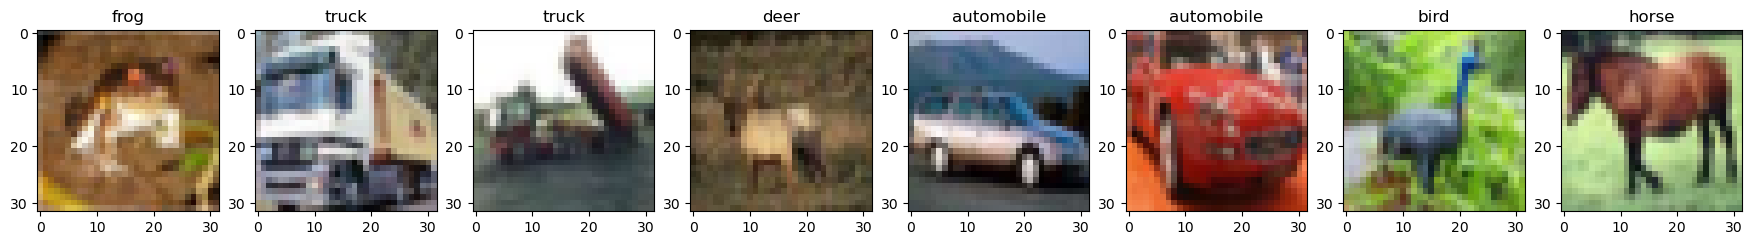

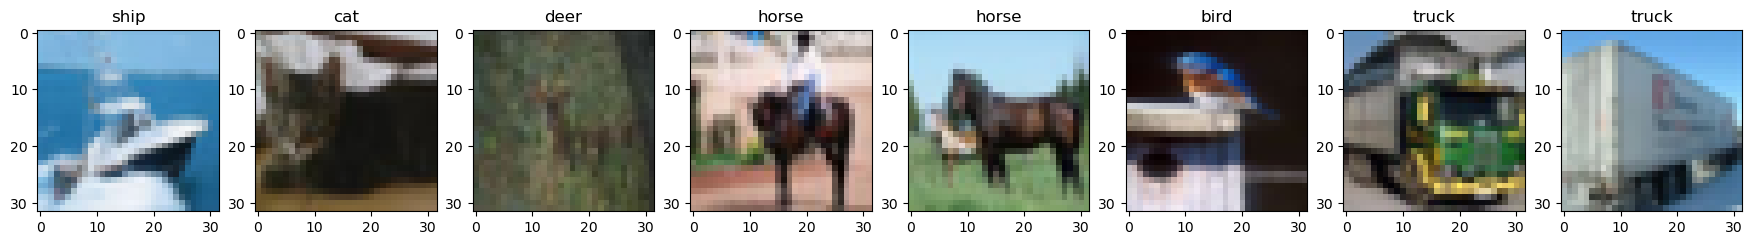

In [6]:
import matplotlib.pyplot as plt

def show_images(images, targets, ncols=8):
    class_names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
    
    figure, axs = plt.subplots(1, ncols, figsize=(22, 6))
    for i in range(ncols):
        axs[i].imshow(images[i])
#       squeeze(): 마지막 axis의 차원을 제거할 때 사용한다
        target = targets[i].squeeze()
        axs[i].set_title(class_names[target])

show_images(train_images[:8], train_targets[:8])
show_images(train_images[8:16], train_targets[8:16])

In [7]:
from tensorflow.keras.datasets import cifar10

(train_images, train_targets), (test_images, test_targets) = cifar10.load_data()

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)
    
    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

In [8]:
train_images[0, :, :, :]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [9]:
print(train_images.shape, train_targets.shape)

(50000, 32, 32, 3) (50000, 1)


In [10]:
train_targets = train_targets.squeeze()
test_targets = test_targets.squeeze()

In [11]:
print(train_targets.shape, test_targets.shape)

(50000,) (10000,)


In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.losses import SparseCategoricalCrossentropy

IMAGE_SIZE = 32

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=5, activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        36928     
                                                           

In [15]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath='./callback_files/weights.{epoch:02d}-{val_loss:.4f}.h5', 
    monitor='val_loss',
    save_best_only=True, 
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    factor=0.2,
    patience=4, 
    monitor='val_loss',
    mode='min'
)

ely_cb = EarlyStopping(
    patience=4, 
    monitor='val_loss',
    mode='min'
)

history = model.fit(x=train_images, y=train_targets, batch_size=64, epochs=30, validation_split=0.2, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/30
625/625 [==============================] - 92s 145ms/step - loss: 1.7542 - acc: 0.3482 - val_loss: 1.4926 - val_acc: 0.4584 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 87s 139ms/step - loss: 1.3778 - acc: 0.4979 - val_loss: 1.2083 - val_acc: 0.5647 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 87s 139ms/step - loss: 1.1739 - acc: 0.5783 - val_loss: 1.0349 - val_acc: 0.6355 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 91s 145ms/step - loss: 1.0228 - acc: 0.6376 - val_loss: 0.9361 - val_acc: 0.6698 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 90s 144ms/step - loss: 0.9128 - acc: 0.6781 - val_loss: 0.8574 - val_acc: 0.6923 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 86s 138ms/step - loss: 0.8388 - acc: 0.7061 - val_loss: 0.8021 - val_acc: 0.7193 - lr: 0.0010
Epoch 7/30
625/625 [==============================] - 85s 135ms/step - loss: 0.7633 - acc: 0.7333 - val_loss: 0.

157/157 [==============================] - 3s 22ms/step - loss: 0.7608 - acc: 0.7554


[0.7607598900794983, 0.7554000020027161]

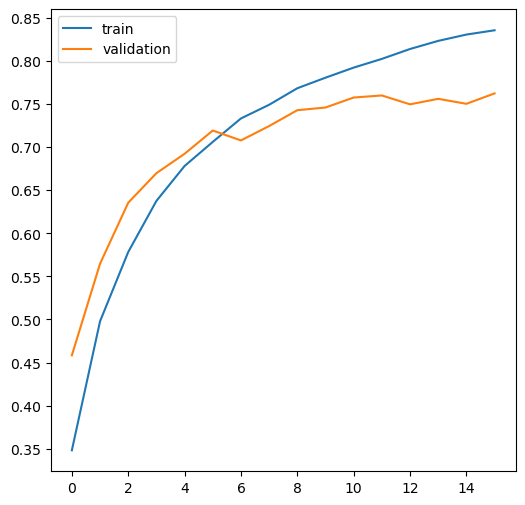

In [17]:
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_targets, batch_size=64)

In [19]:
pred_probas = model.predict(test_images[8:16], batch_size=64)
print('softmax outputs: ', pred_probas)

preds = np.argmax(np.squeeze(pred_probas))
print(preds)

prediected_class = np.argmax(pred_probas, axis=1)
print('prediected target values: ', prediected_class)

1/1 [==============================] - 0s 26ms/step
softmax outputs:  [[1.94605145e-05 1.31105730e-06 2.61536683e-03 9.03673828e-01
  1.33046024e-02 6.38994351e-02 9.98601038e-03 6.48178626e-03
  1.47451965e-06 1.67059716e-05]
 [5.48485760e-03 7.98648536e-01 4.03051148e-04 1.04864838e-03
  2.87806848e-04 3.27865506e-04 6.35843631e-03 9.65642394e-05
  6.36985153e-02 1.23645641e-01]
 [8.91271412e-01 1.69676005e-05 7.07977964e-03 1.26071218e-02
  3.70457359e-02 4.29854868e-03 1.50774067e-04 3.53374891e-03
  4.39038575e-02 9.20335369e-05]
 [4.79138376e-13 1.11220599e-09 2.10821458e-16 5.27981100e-16
  6.99326197e-21 2.24615777e-19 2.67184169e-17 4.38168355e-21
  1.54609073e-12 1.00000000e+00]
 [1.26915184e-05 4.36907385e-07 6.61873259e-03 4.35612388e-02
  9.03273523e-01 3.09200268e-02 1.36083271e-02 2.00186321e-03
  1.53999645e-06 1.62025458e-06]
 [9.35522166e-08 2.23343909e-06 5.62247988e-06 1.52514968e-03
  1.19343495e-04 4.09103632e-02 3.47584182e-06 9.57414985e-01
  1.21968959e-08 1.87

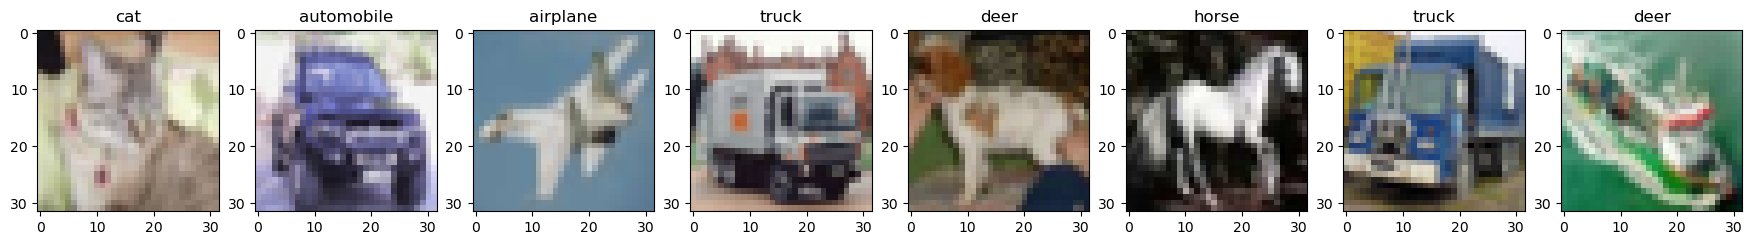

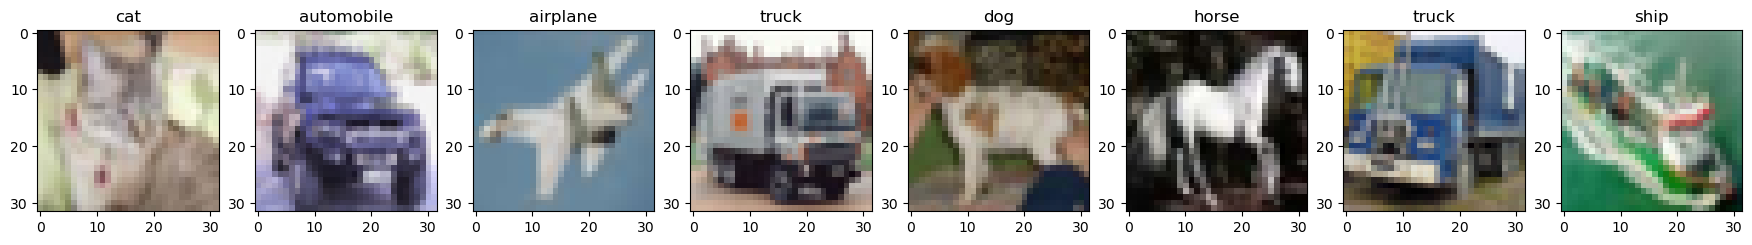

In [25]:
import matplotlib.pyplot as plt

def show_images(images, targets, ncols=8):
    class_names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
    
    figure, axs = plt.subplots(1, ncols, figsize=(22, 6))
    
    for i in range(ncols):
        axs[i].imshow(images[i])
#       squeeze(): 마지막 axis의 차원을 제거할 때 사용한다
        target = targets[i].squeeze()
        axs[i].set_title(class_names[int(target)])

show_images(test_images[8:16], prediected_class[:8])
show_images(test_images[8:16], test_targets[8:16])